Ingrid Izaguirre

UNI: ii2182

Research Computing in Earth Science 

Final Project

Figure list:

1. Assessment of the distribution of data - shown to be of not normal distribution
2. Global Barium & Salinity Cartopy plots 

In [2]:
import pandas as pd
import xarray as xr
import cartopy 
import cartopy.crs as ccrs
import numpy as np 
from matplotlib import pyplot as plt 
from statsmodels.graphics.gofplots import qqplot
import math
import matplotlib.patches as mpatches
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [30]:
! wget https://ndownloader.figshare.com/files/19804955?private_link=bff2bc90bc79f5bff9fe

trace_data = xr.open_dataset('GEOTRACES_IDP2017_v2_Discrete_Sample_Data.nc')
#trace_data


--2019-12-01 22:40:13--  https://ndownloader.figshare.com/files/19804955?private_link=bff2bc90bc79f5bff9fe
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 54.246.201.126, 52.211.23.240, 52.17.93.139, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|54.246.201.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4500484732 (4.2G) [application/x-netcdf]
Saving to: ‘19804955?private_link=bff2bc90bc79f5bff9fe’

19804955?private_li 100%[===================>]   4.19G  16.8MB/s    in 2m 57s  

2019-12-01 22:43:11 (24.3 MB/s) - ‘19804955?private_link=bff2bc90bc79f5bff9fe’ saved [4500484732/4500484732]



In [31]:
# select and rename lat and lon variables from original dataset 
lat = trace_data.latitude
print(lat)

lon = trace_data.longitude
print(lon)

# selecting and renaming the CTD salinity data from the dataset
sal = trace_data.var8
print(sal)

# selecting and renaming dissolved Ba in seawater from the orginal dataset 
ba = trace_data.var69
print(ba)

p = trace_data.var1
print(p)

d = trace_data.var2
print(d)

t = trace_data.var7
print(t)

## HOW DO I GET THE LAT AND LON COORDINATES 

<xarray.DataArray 'latitude' (N_STATIONS: 1866)>
array([ 38.4329,  40.3332,  40.3331, ...,  49.566 ,  48.65  , -38.9647],
      dtype=float32)
Dimensions without coordinates: N_STATIONS
Attributes:
    long_name:       Latitude
    units:           degrees_north
    C_format:        %.3f
    FORTRAN_format:  F12.3
<xarray.DataArray 'longitude' (N_STATIONS: 1866)>
array([349.3   , 349.9641, 350.5405, ..., 221.333 , 233.333 , 179.403 ],
      dtype=float32)
Dimensions without coordinates: N_STATIONS
Attributes:
    long_name:       Longitude
    units:           degrees_east
    C_format:        %.3f
    FORTRAN_format:  F12.3
    valid_min:       0.0
    valid_max:       360.0
<xarray.DataArray 'var8' (N_STATIONS: 1866, N_SAMPLES: 698)>
[1302468 values with dtype=float32]
Dimensions without coordinates: N_STATIONS, N_SAMPLES
Attributes:
    long_name:       CTDSAL
    comment:         Practical salinity from CTD sensor on the PSS-1978 scale
    C_format:        %.3f
    FORTRAN_format: 

In [32]:
sal_ba = xr.Dataset(data_vars={'salinity':    (('N_STATIONS', 'N_SAMPLES'), sal),
                               'barium': (('N_STATIONS', 'N_SAMPLES'), ba), 
                               'latitude': ('N_STATIONS', lat), 
                               'longitude': ('N_STATIONS', lon),
                               'pressure': (('N_STATIONS', 'N_SAMPLES'), p),
                               'depth' : (('N_STATIONS', 'N_SAMPLES'), d),
                   'temp' : (('N_STATIONS', 'N_SAMPLES'), t)},
                    coords={'N_STATIONS': trace_data.N_STATIONS,
                            'N_SAMPLES': trace_data.N_SAMPLES})
sal_ba

<xarray.Dataset>
Dimensions:     (N_SAMPLES: 698, N_STATIONS: 1866)
Coordinates:
  * N_STATIONS  (N_STATIONS) int64 0 1 2 3 4 5 ... 1860 1861 1862 1863 1864 1865
  * N_SAMPLES   (N_SAMPLES) int64 0 1 2 3 4 5 6 ... 691 692 693 694 695 696 697
Data variables:
    salinity    (N_STATIONS, N_SAMPLES) float32 34.951 34.951 34.951 ... nan nan
    barium      (N_STATIONS, N_SAMPLES) float32 nan nan nan nan ... nan nan nan
    latitude    (N_STATIONS) float32 38.4329 40.3332 40.3331 ... 48.65 -38.9647
    longitude   (N_STATIONS) float32 349.3 349.9641 350.5405 ... 233.333 179.403
    pressure    (N_STATIONS, N_SAMPLES) float32 3000.7 3000.8 3000.8 ... nan nan
    depth       (N_STATIONS, N_SAMPLES) float32 2957.1 2957.2 2957.2 ... nan nan
    temp        (N_STATIONS, N_SAMPLES) float32 2.84 2.841 2.84 ... nan nan nan

In [33]:
meandata = sal_ba.mean('N_SAMPLES')
meandata

<xarray.Dataset>
Dimensions:     (N_STATIONS: 1866)
Coordinates:
  * N_STATIONS  (N_STATIONS) int64 0 1 2 3 4 5 ... 1860 1861 1862 1863 1864 1865
Data variables:
    salinity    (N_STATIONS) float32 34.951 35.505802 35.548206 ... nan nan nan
    barium      (N_STATIONS) float32 nan nan nan nan nan ... nan nan nan nan nan
    latitude    (N_STATIONS) float32 38.4329 40.3332 40.3331 ... 48.65 -38.9647
    longitude   (N_STATIONS) float32 349.3 349.9641 350.5405 ... 233.333 179.403
    pressure    (N_STATIONS) float32 3000.879 867.3654 ... 505.37057 242.31665
    depth       (N_STATIONS) float32 2957.2793 855.99005 ... 500.03528 240.28333
    temp        (N_STATIONS) float32 2.8399165 11.118125 14.370937 ... nan nan

In [34]:
pdmean = meandata.to_dataframe()
pdmean

salinity  barium   latitude   longitude     pressure  \
N_STATIONS                                                          
0           34.951000     NaN  38.432899  349.299988  3000.878906   
1           35.505802     NaN  40.333199  349.964111   867.365417   
2           35.548206     NaN  40.333099  350.540497    64.664581   
3           35.543293     NaN  40.332901  350.356812   155.658325   
4           35.726898     NaN  40.333302  350.233398   293.327057   
5           35.836624     NaN  40.333000  350.198090   571.366638   
6           35.716583     NaN  40.333099  350.123810   919.849915   
7           35.549625     NaN  40.333000  350.055908  1286.583374   
8           35.538624     NaN  40.333000  349.964203  1288.470825   
9           35.583416     NaN  40.332500  349.422699  1430.187500   
10          35.468830     NaN  40.333000  348.659912  1711.083374   
11          35.565025     NaN  40.332500  347.780914  1120.813965   
12          35.410709     NaN  40.787201  346.900085  1787.037476   
13          35.538059     NaN  41.382900  346.112396  1155.643311   
14          35.359707     NaN  41.982601  345.327515  1783.383423   
15          35.491150     NaN  42.581200  344.538910  1060.404053   
16          35.316040     NaN  43.181499  343.754700  1776.591675   
17          35.468582     NaN  43.779900  342.968384   841.981873   
18          35.286747     NaN  44.376701  342.183197  1865.887573   
19          35.426235     NaN  45.050499  341.494690   989.695740   
20          35.183666     NaN  45.793900  340.908600  1825.633301   
21          35.395260     NaN  46.544201  340.327911  1105.443848   
22          35.200420     NaN  47.289799  339.738098  1613.120972   
23          35.410690     NaN  48.039001  339.152496   961.450073   
24          35.168163     NaN  48.785500  338.567810  1583.608398   
25          35.305305     NaN  49.529202  337.982788   966.954224   
26          35.109795     NaN  50.277802  337.395691   954.787415   
27          35.022373     NaN  51.029598  336.809296  1571.441528   
28          35.048374     NaN  52.024700  336.026886  1568.595825   
29          34.976528     NaN  53.019600  335.248108   786.211365   
...               ...     ...        ...         ...          ...   
1836        34.628124     NaN  10.634200  148.901001  2119.888428   
1837              NaN     NaN   8.654300  150.901993     5.000000   
1838        34.591560     NaN   6.784200  154.197998  1796.429565   
1839        34.796535     NaN   2.004600  157.998001   210.164291   
1840        34.715462     NaN   0.000100  160.000000   309.328583   
1841        34.888866     NaN  -2.002100  162.000000   963.774963   
1842        34.814056     NaN  -8.201900  166.082993  1867.866699   
1843        34.847431     NaN -15.217900  173.518997  1005.453308   
1844        34.277000     NaN  32.333199  127.499001    62.640003   
1845        35.195000     NaN  21.658001  201.908005    29.866669   
1846        35.217999     NaN  21.750700  202.014999    60.379997   
1847        34.612270     NaN  21.844999  202.016998   615.472717   
1848        34.640800     NaN  22.750000  202.000000  1581.466675   
1849        35.158001     NaN  21.285000  202.039993    73.879997   
1850        34.982716     NaN  21.456600  201.759003   134.185715   
1851              NaN     NaN  48.967999  229.332993   750.482666   
1852              NaN     NaN  49.283001  225.332993   862.188477   
1853              NaN     NaN  49.566002  221.332993   822.290039   
1854              NaN     NaN  50.000000  215.000000  1049.920044   
1855              NaN     NaN  48.650002  233.332993   343.009094   
1856              NaN     NaN  48.967999  229.332993   701.352417   
1857              NaN     NaN  49.283001  225.332993   388.918182   
1858              NaN     NaN  49.566299  221.330994  1098.150024   
1859              NaN     NaN  50.000000  215.000000   709.830017   
1860              NaN     NaN  48.650002  233.332993    28.566668   
1861       

# Assessing Distribution of Data:
suggests that the data is not evenly distributed. This means that to determine the correlation between 
Ba and Salinity, non-parametric statistical methods should be used. 

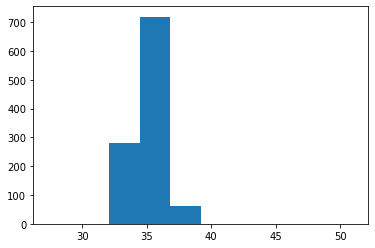

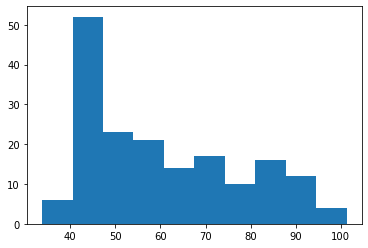

In [35]:
plt.hist(pdmean.salinity)
plt.show()

plt.hist(pdmean.barium)
plt.show()

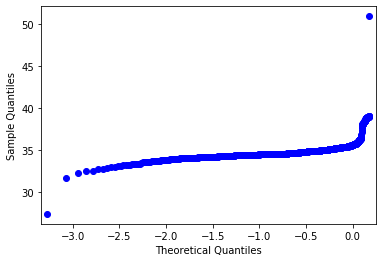

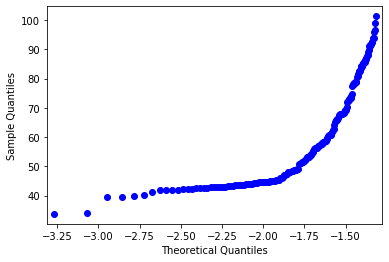

In [36]:
qqplot(pdmean.salinity, line = 's')
plt.show()

qqplot(pdmean.barium, line = 's')
plt.show()

# Full Dataset Plots of Barium, Salinity and Temperature

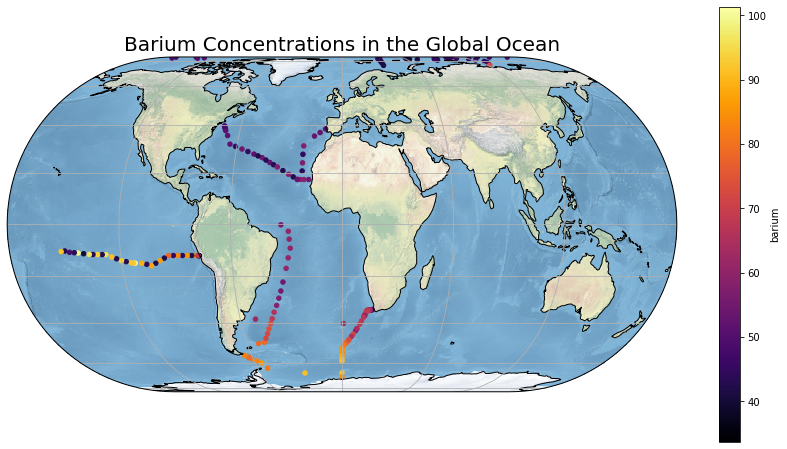

In [37]:
fig = plt.figure(figsize=(15,8))
#fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax = plt.axes(projection=ccrs.EckertIV())
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Barium Concentrations in the Global Ocean', size = 20)
pdmean.plot.scatter('longitude','latitude', c = 'barium', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno')

## find a way to re-label the colorbar with units 

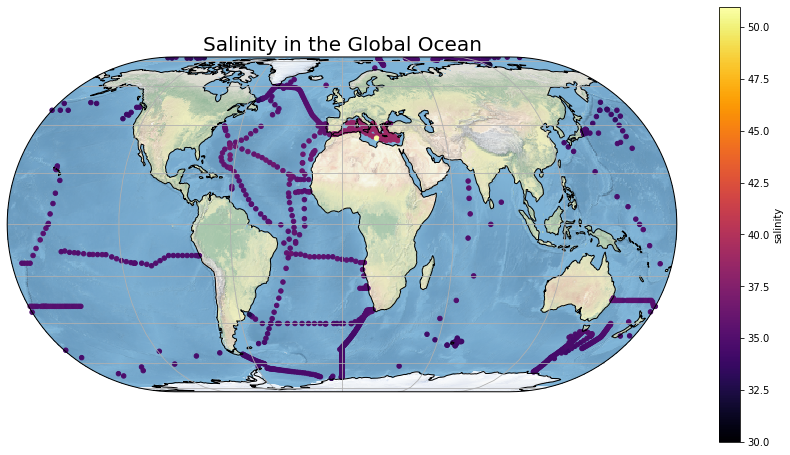

In [38]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV())
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Salinity in the Global Ocean', size = 20)
pdmean.plot.scatter('longitude','latitude', c = 'salinity', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno', vmin = 30)

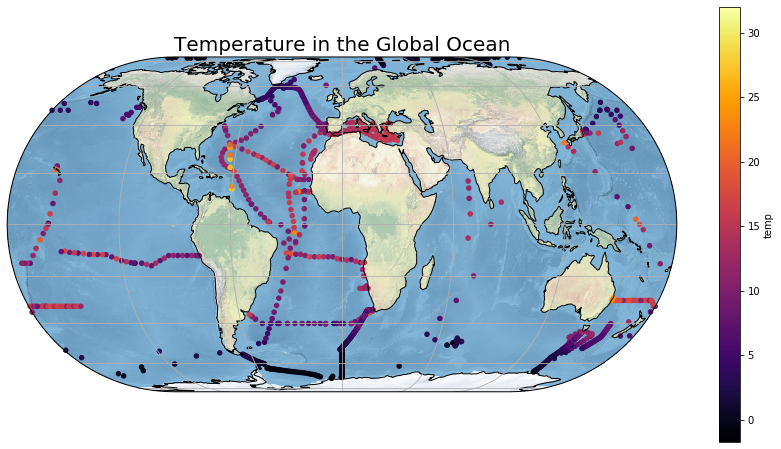

In [39]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV())
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Temperature in the Global Ocean', size = 20)
pdmean.plot.scatter('longitude','latitude', c = 'temp', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno', vmax=32)

# correlation between salinity & barium in the overall dataset

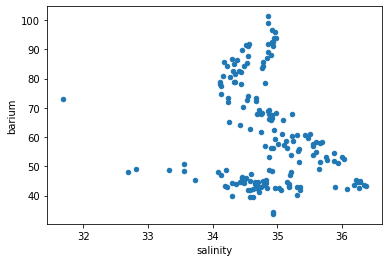

In [40]:
#overall correlation of the dataset 
pdmean.plot.scatter('salinity','barium')


# Statistical Distribution of Salinity and Barium in the surface ocean 

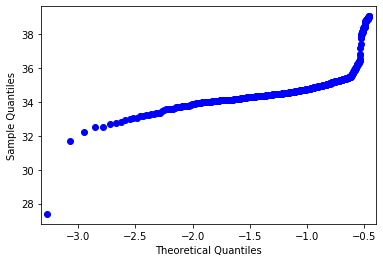

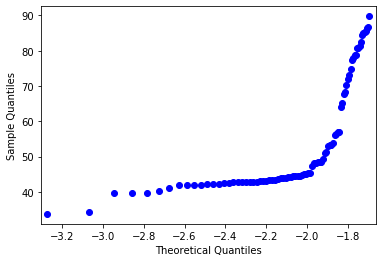

In [41]:
depth_mask = (pdmean['depth'] >= 0) & (pdmean['depth'] <= 1000)
surf_oc = pdmean.where(depth_mask == True)

qqplot(surf_oc.salinity, line = 's')
plt.show()

qqplot(surf_oc.barium, line = 's')
plt.show()

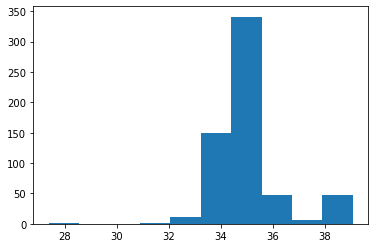

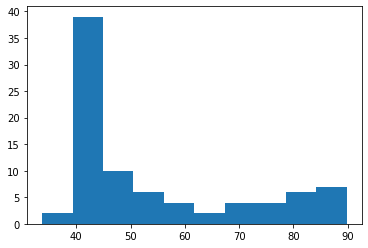

In [42]:
plt.hist(surf_oc.salinity)
plt.show()

plt.hist(surf_oc.barium)
plt.show()

# Salinity vs Barium in the Surface Ocean globally 

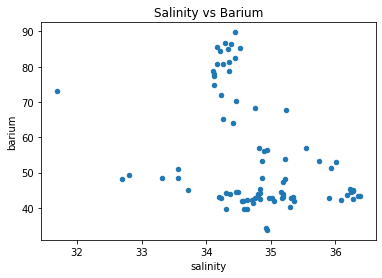

In [43]:
surf_oc.plot.scatter('salinity','barium', title = 'Salinity vs Barium')

# Subset Data by Depth and Ocean basin to look at surface ocean Salinity and Barium values and how they vary across the oceans

In [44]:
#N Atl lat expanse
natl_latmin = 0 
natl_latmax = 68.6387

#S Atl lat expanse
satl_latmin = -76.13
satl_latmax = -0.54

#Pacific ocean expanse
pac_latmin = -50.33
pac_latmax = 18.23
pac_lonmin = 100
pac_lonmax = 280

depth_mask = (pdmean['depth'] >= 0) & (pdmean['depth'] <= 1000)
surf_oc = pdmean.where(depth_mask == True)
#print(surf_oc)

N_Atl_lat = (surf_oc['latitude'] >= natl_latmin) & (surf_oc['latitude'] <= natl_latmax) 
N_Atl = surf_oc.where(N_Atl_lat == True)
#print(N_Atl)

S_Atl_lat = (surf_oc['latitude'] >= satl_latmin) & (surf_oc['latitude'] <= satl_latmax)
S_Atl = pdmean.where(S_Atl_lat == True)
#print(S_Atl)


Pac_lon = (surf_oc['longitude'] >= pac_lonmin) & (surf_oc['longitude'] <= pac_lonmax)
Pac = surf_oc.where(Pac_lon == True)
#print(Pac)



# Plot correlations between salinity and barium per ocean basin (N. Atl vs S.O. vs Pac.)

# Plots for the North Atlantic 

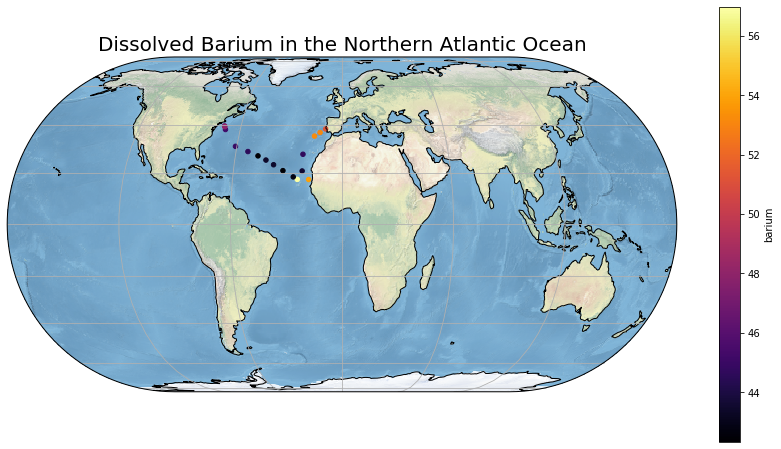

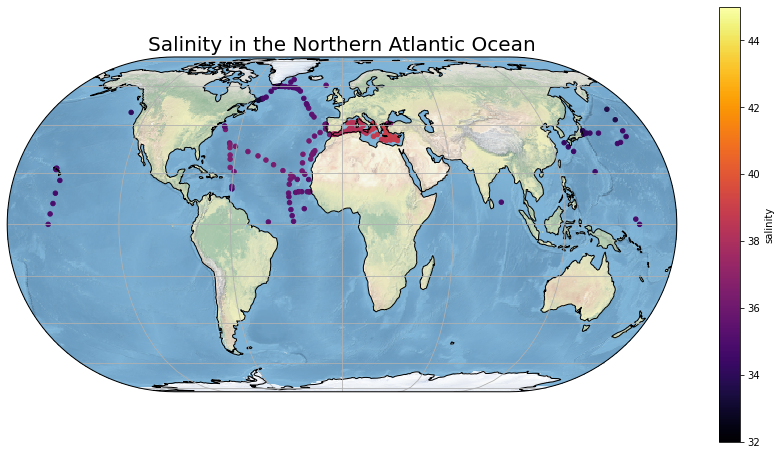

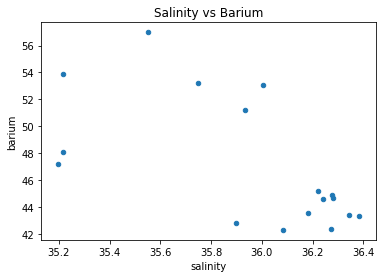

In [45]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV())
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Dissolved Barium in the Northern Atlantic Ocean', size = 20)
N_Atl.plot.scatter('longitude','latitude', c = 'barium', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno')

fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV())
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Salinity in the Northern Atlantic Ocean', size = 20)
N_Atl.plot.scatter('longitude','latitude', c = 'salinity', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno', vmin = 32, vmax = 45)

N_Atl.plot.scatter('salinity','barium', title = 'Salinity vs Barium')

# Plots for the Southern Atlantic 

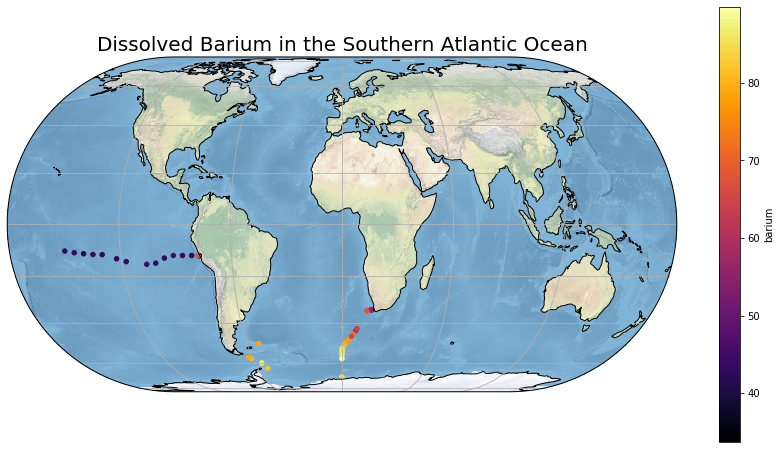

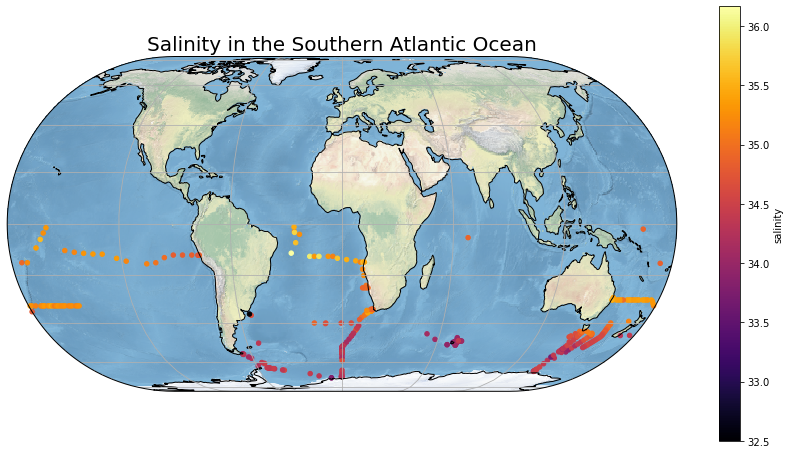

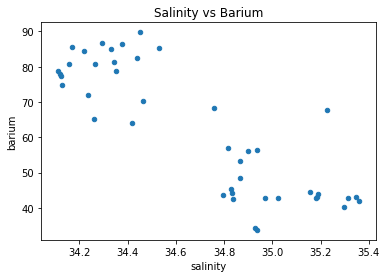

In [46]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV())
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Dissolved Barium in the Southern Atlantic Ocean', size = 20)
S_Atl.plot.scatter('longitude','latitude', c = 'barium', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno')

fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV())
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Salinity in the Southern Atlantic Ocean', size = 20)
S_Atl.plot.scatter('longitude','latitude', c = 'salinity', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno')

S_Atl.plot.scatter('salinity','barium', title = 'Salinity vs Barium')

# Plots for the Pacific Ocean 

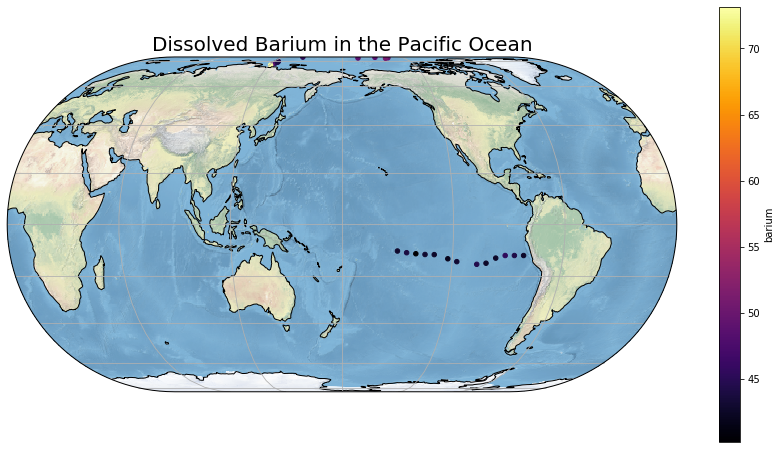

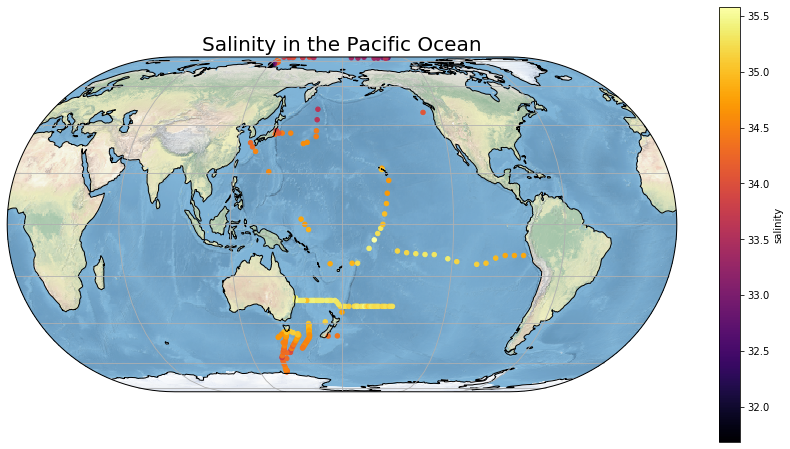

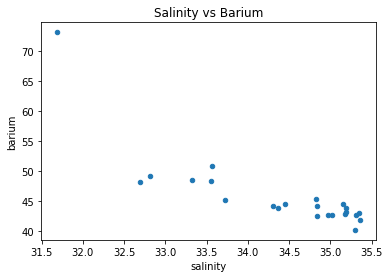

In [47]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV(central_longitude = 180))
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Dissolved Barium in the Pacific Ocean', size = 20)
Pac.plot.scatter('longitude','latitude', c = 'barium', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno')

fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV(central_longitude = 180))
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.set_title('Salinity in the Pacific Ocean', size = 20)
Pac.plot.scatter('longitude','latitude', c = 'salinity', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno')

Pac.plot.scatter('salinity','barium', title = 'Salinity vs Barium')

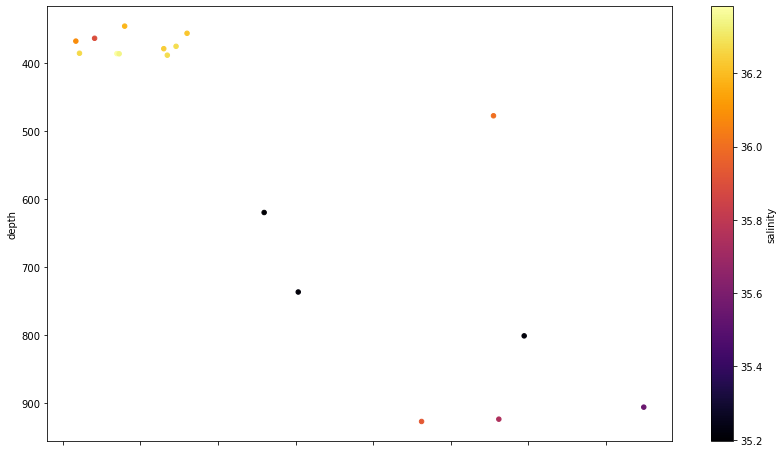

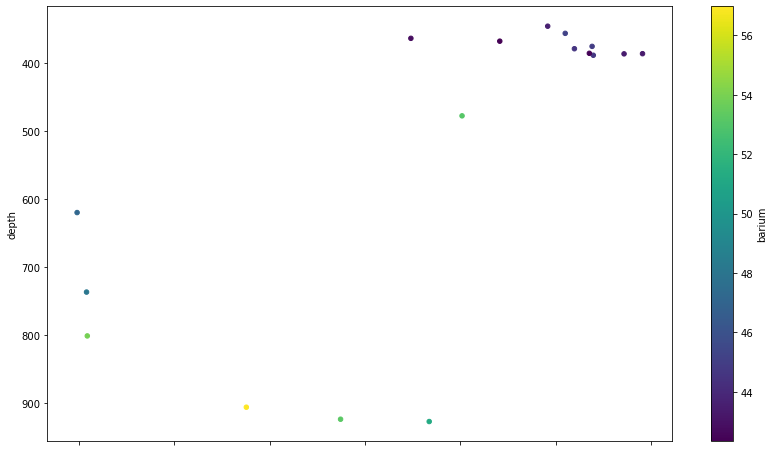

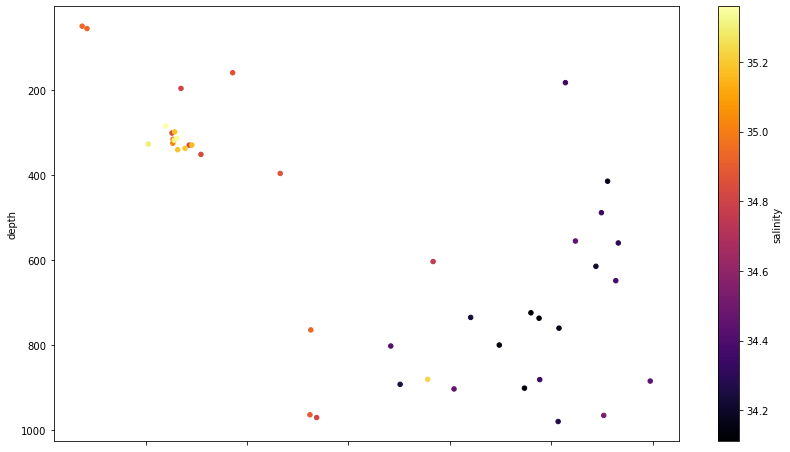

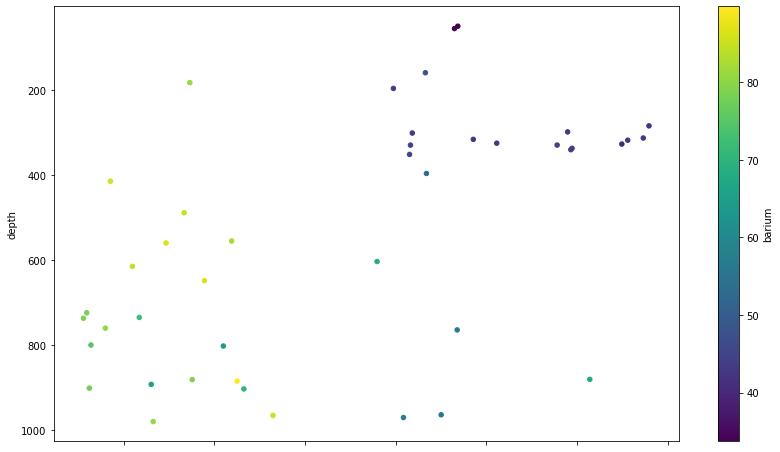

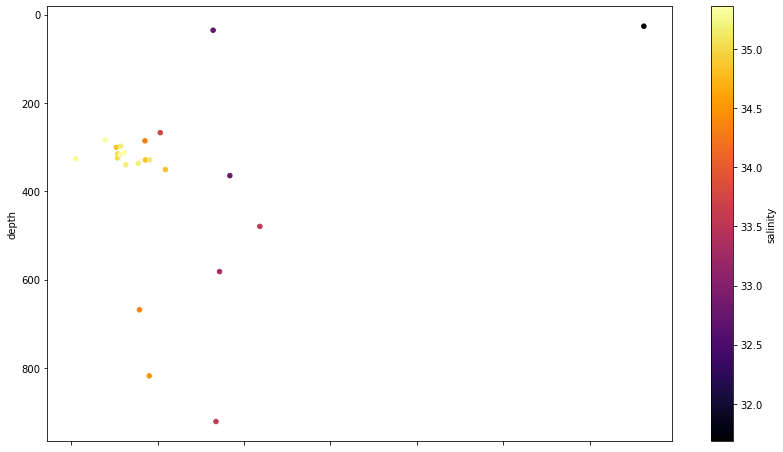

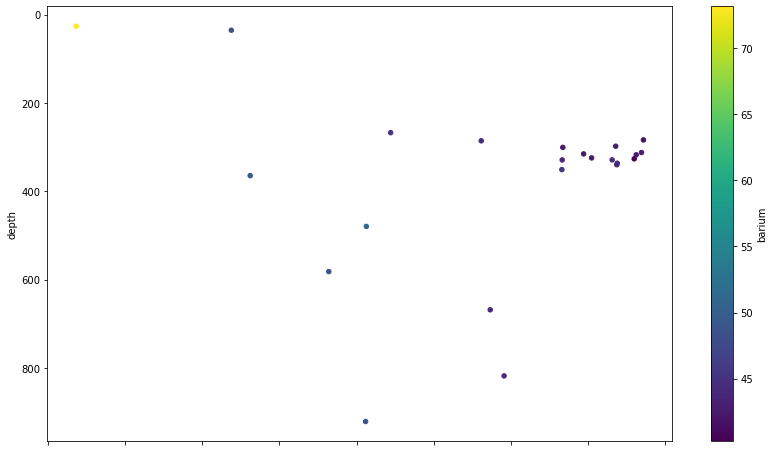

In [48]:


N_Atl.plot.scatter('barium', 'depth', c = 'salinity', colormap = 'inferno', figsize=(14,8))
plt.gca().invert_yaxis()
N_Atl.plot.scatter('salinity', 'depth', c = 'barium', colormap = 'viridis', figsize=(14,8))
plt.gca().invert_yaxis()

S_Atl.plot.scatter('barium', 'depth', c = 'salinity', colormap = 'inferno', figsize=(14,8) )
plt.gca().invert_yaxis()
S_Atl.plot.scatter('salinity', 'depth', c = 'barium', colormap = 'viridis', figsize=(14,8))
plt.gca().invert_yaxis()

Pac.plot.scatter('barium', 'depth', c = 'salinity', colormap = 'inferno', figsize=(14,8) )
plt.gca().invert_yaxis()
Pac.plot.scatter('salinity', 'depth', c = 'barium', colormap = 'viridis', figsize=(14,8))
plt.gca().invert_yaxis()

# trying to make a more complex figure

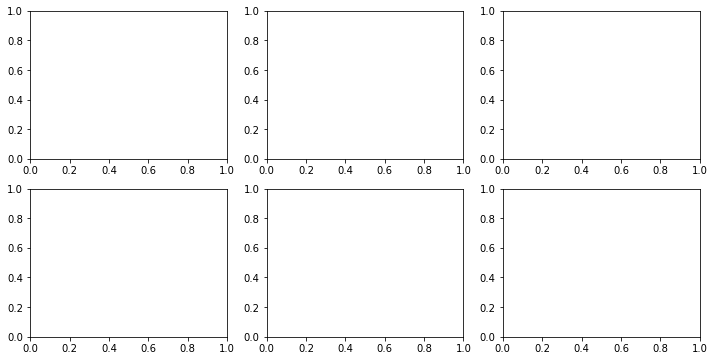

In [49]:
fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(nrows=2, ncols=3)



# how to do an interpolation?
    
#then calculate the correlation between salinity and Ba (make sure it's over lat/lon tho)
    #plot correlation in cartopy 

#convert KML file to CSV 
    # use this to impose IODP drill holes onto cartopy plots 
    # consider making a threshold value for where not to take cores for Ba studies 
        # plot this?

#put data on figshare and then link to github

#use travis CI to test code 